# ScRNA-Seq of human bone marrow cells from Oetjen et al.

Based on the work of [Luecken, MD., et al.](https://www.nature.com/articles/s41592-021-01336-8#Sec35)
<br>Code: https://github.com/theislab/scib-reproducibility/blob/main/notebooks/data_preprocessing/immune_cells/Bone_Marrow_Human/BM_Oetjen_1.ipynb 
<br>
<br>Data from [Oetjen et al.](https://insight.jci.org/articles/view/124928)
<br>Data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3396161 

In [1]:
# Import packages
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
from functions import data_preprocessing as dp
import seaborn as sns
import random
import warnings

In [2]:
# Path of data
file_base = '../../../../data/raw/immune_cells/bone_marrow_human/GSM3396161_A/'
count_file_end = 'GSM3396161_matrix_A.mtx.gz'
gene_data_end = 'GSM3396161_genes_A.tsv.gz'
barcode_data_end = 'GSM3396161_barcodes_A.tsv.gz'

count_data = file_base+count_file_end
gene_data = file_base+gene_data_end
barcode_data = file_base+barcode_data_end

# Read data
adata = dp.read_sc_data(count_data, gene_data, barcode_data)

adata.var_names_make_unique()

In [3]:
print(adata.X.shape)
print(adata)

(2994, 33694)
AnnData object with n_obs × n_vars = 2994 × 33694
    var: 'gene_id'


In [4]:
adata.var.head()

,gene_id
gene_symbol,
RP11-34P13.3,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945


## Preprocessing

In [5]:
# Add QC metrics to adata
adata = dp.QC().QC_metric_calc(adata)
print(adata.obs)

                    n_counts  log_n_counts  n_genes  log_n_genes  \
barcode                                                            
AAACCTGCAAGTAATG-1   10568.0      9.265680      519     6.253829   
AAACCTGCAGCGAACA-1    6379.0      8.760923     1862     7.529943   
AAACCTGCATGTCCTC-1    4172.0      8.336390     1082     6.987490   
AAACCTGGTCGACTGC-1    6608.0      8.796187     1618     7.389564   
AAACCTGGTCGCTTCT-1    5034.0      8.524169     1413     7.254178   
...                      ...           ...      ...          ...   
TTTGGTTGTTAAAGAC-1    3917.0      8.273336      960     6.867974   
TTTGGTTTCCACGCAG-1    3971.0      8.287025     1143     7.042286   
TTTGTCAAGCAAATCA-1    4868.0      8.490644     1062     6.968850   
TTTGTCACAGGGTATG-1    9796.0      9.189832      524     6.263398   
TTTGTCATCAGGCCCA-1    3966.0      8.285766      882     6.783325   

                    pct_counts_in_top_20_genes   mt_frac  
barcode                                                 

In [6]:
qc_adata = dp.QC().QC_filter_outliers(adata,5)

Number of cells before QC filtering: 2994
Number of cells removed by log_n_genes filtering: 66
Number of cells removed by log_n_counts filtering: 39
Number of cells removed by pct_counts_in_top_20_genes filtering: 620
Number of cells removed by mt_frac filtering: 22
Number of cells post QC filtering: 2311
Number of genes before filtering: 33694
Number of genes after filtering so theres min 20 unique cells per gene: 12438


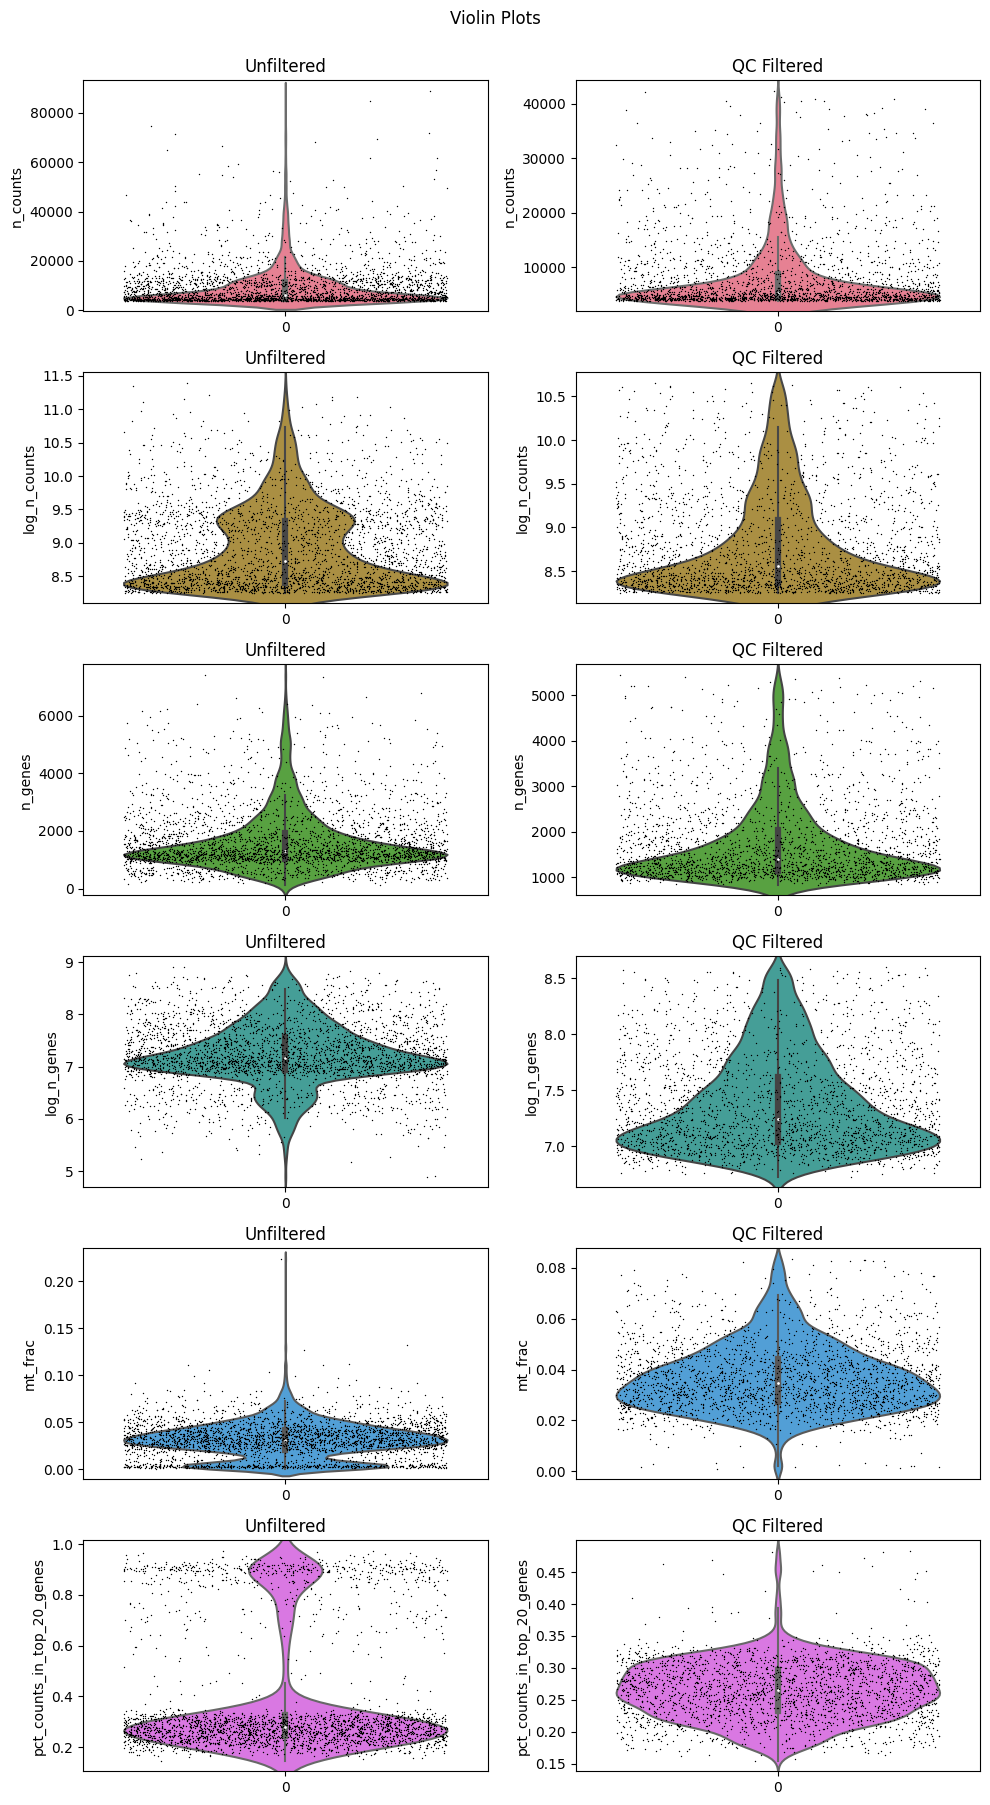

In [7]:
dp.EDA().ViolinJitter([adata, qc_adata], 
                        y_rows=['n_counts','log_n_counts','n_genes','log_n_genes','mt_frac','pct_counts_in_top_20_genes'], 
                        title="Violin Plots",
                        subtitle=["Unfiltered", "QC Filtered"])

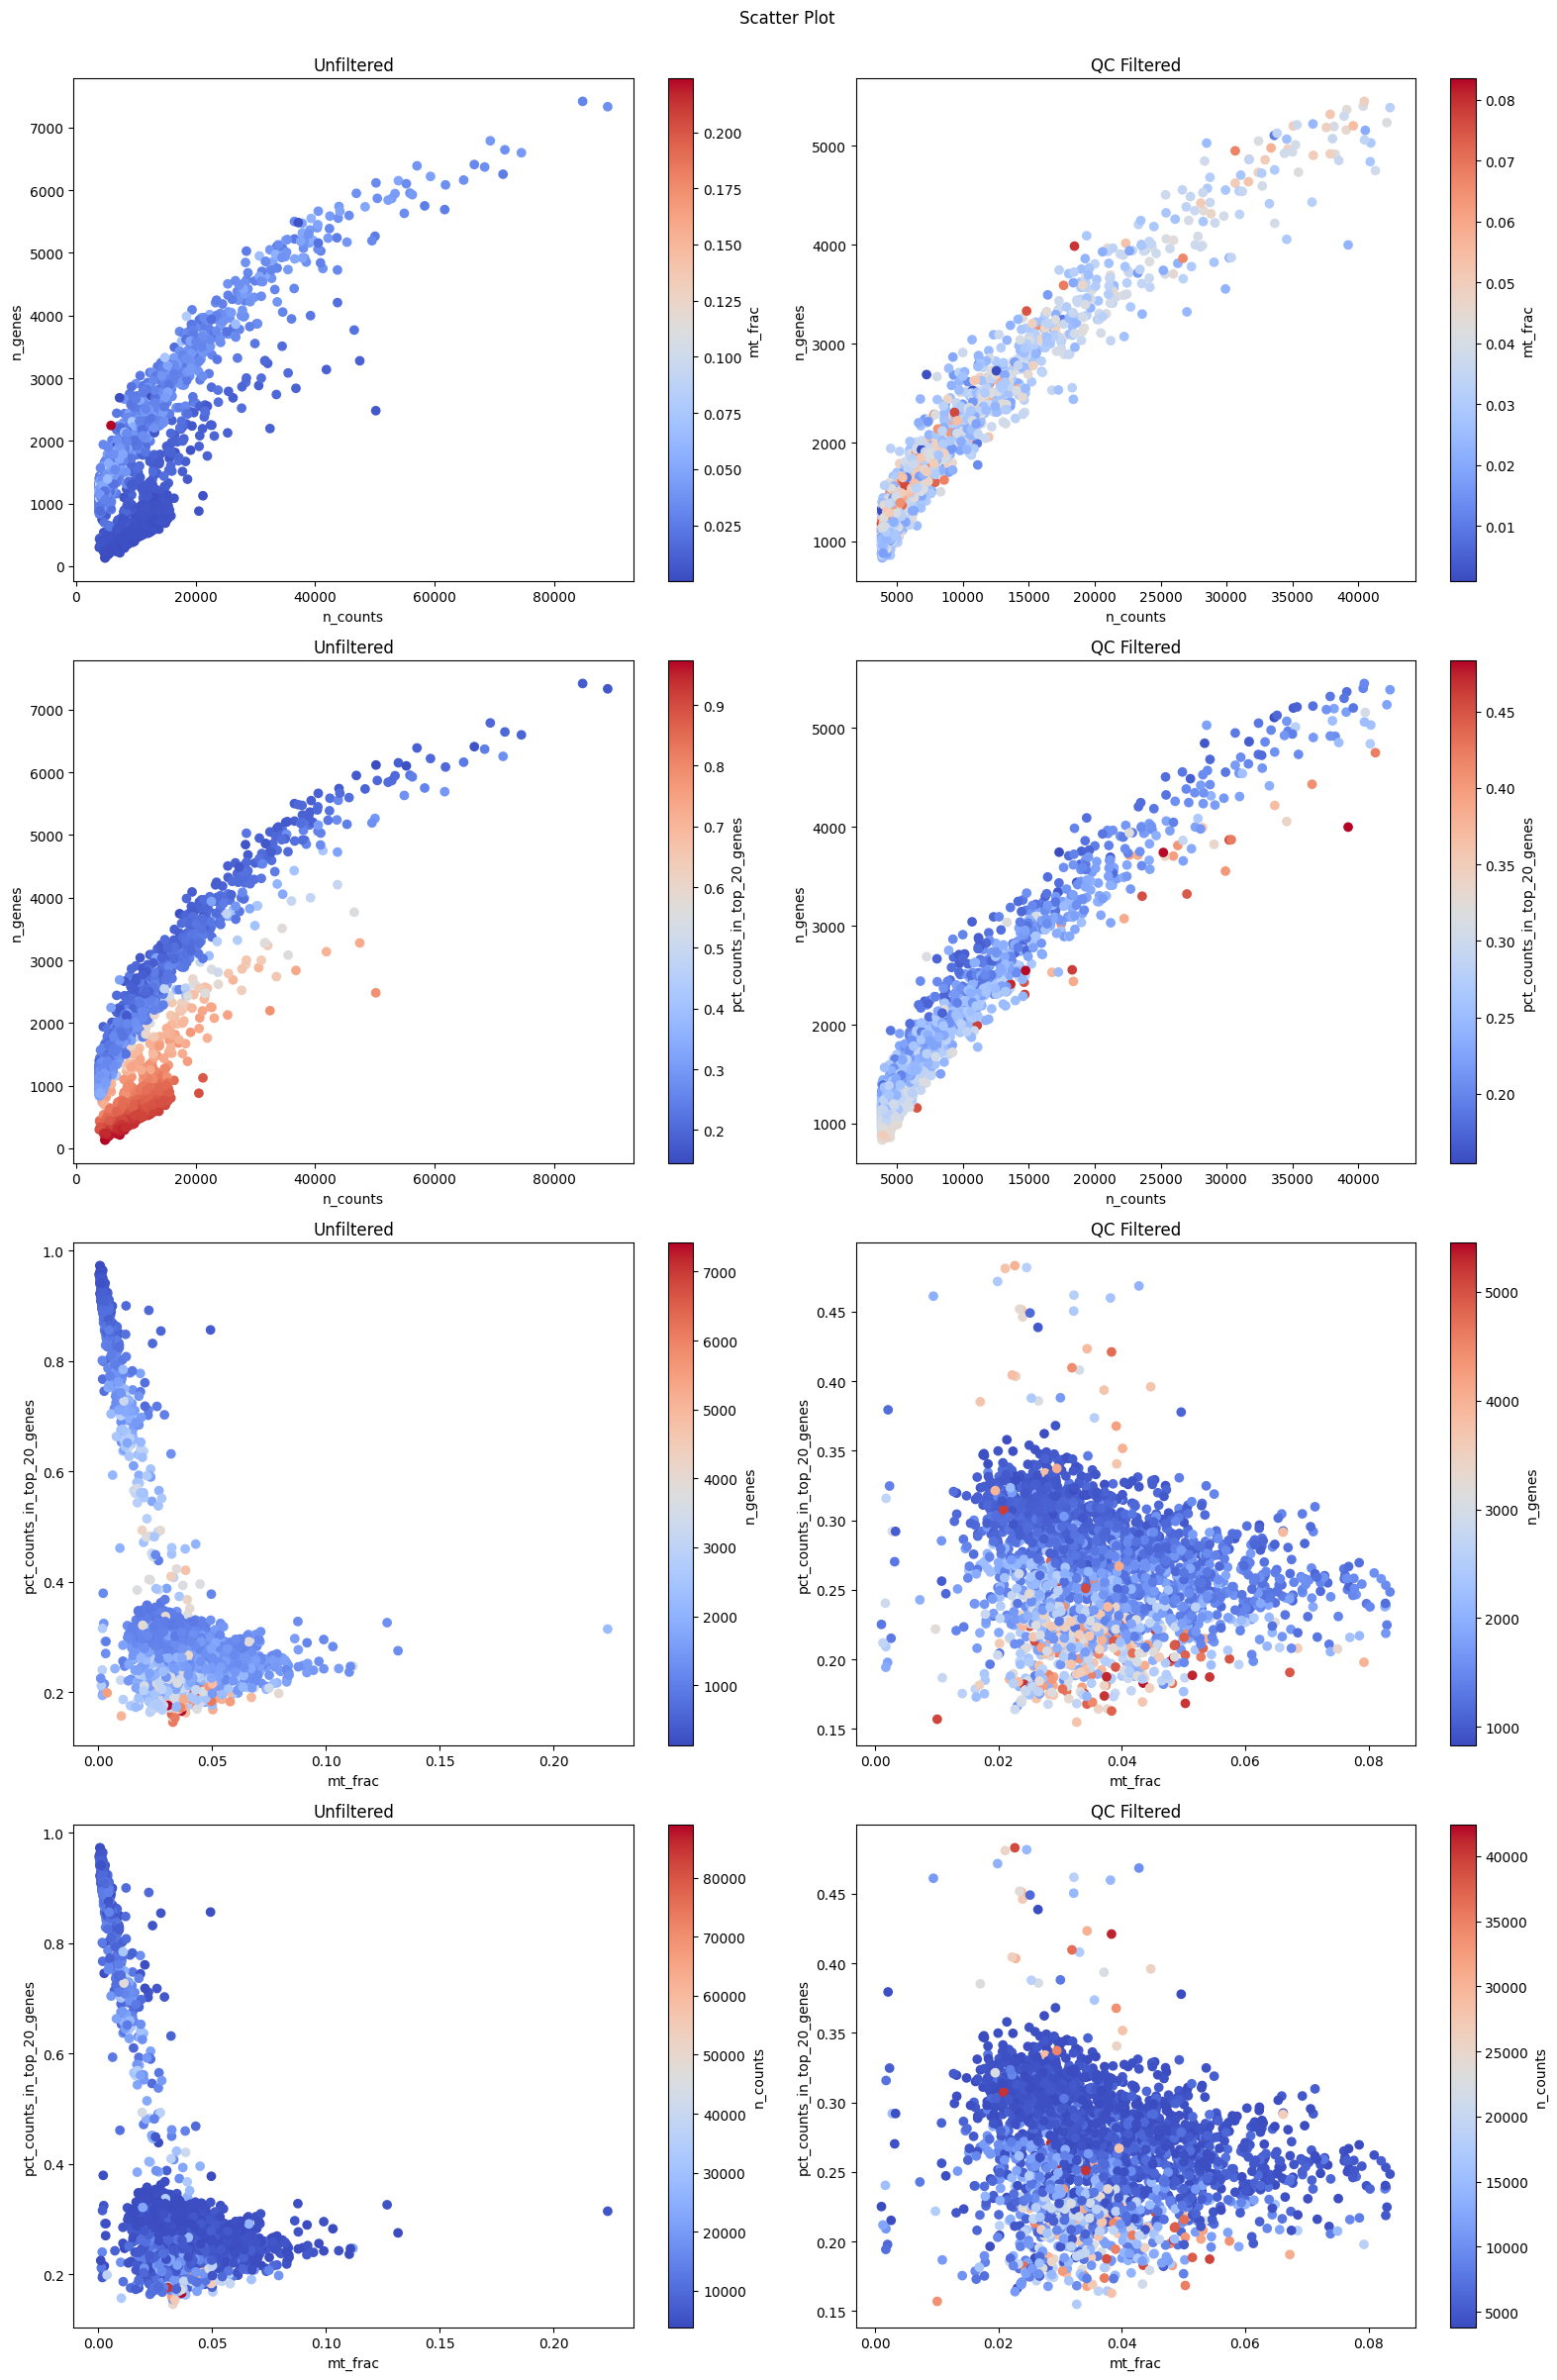

In [8]:
dp.EDA().Scatter([adata, qc_adata],
                title="Scatter Plot",
                subtitle=["Unfiltered", "QC Filtered"])

## Normalize